<a href="https://colab.research.google.com/github/bennyfarias/churn-prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Predição de evasão em Clientes de Cartão de Crédito

**Importação das Bibliotecas**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


**Carregamento Data Set**

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/tassneam/Credit-Card-Customers-Prediction/main/BankChurners.csv')

**Pré-processamento dos Dados**

In [19]:
df = df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier'], axis=1)


df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Treinamento do Modelo**

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Avaliação do Modelo**

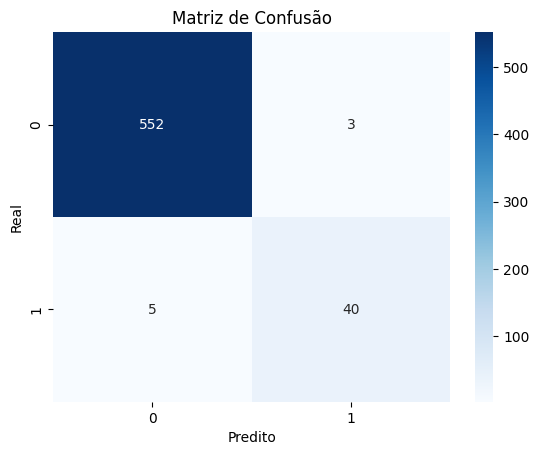

Acurácia: 0.99
Precisão: 0.93
Recall: 0.89
F1-score: 0.91


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# supondo y_test e y_pred
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Exibe métricas adicionais
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precisão: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred):.2f}")


**Distribuição da Idade dos Clientes**

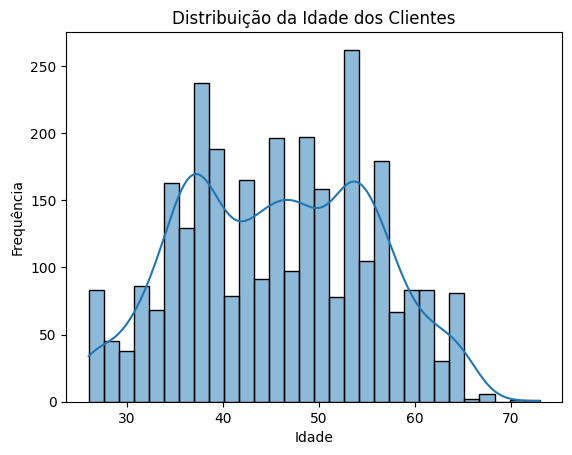

In [22]:
sns.histplot(df['Customer_Age'], bins=30, kde=True)
plt.title('Distribuição da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


**Relação entre Limite de Crédito e Churn**

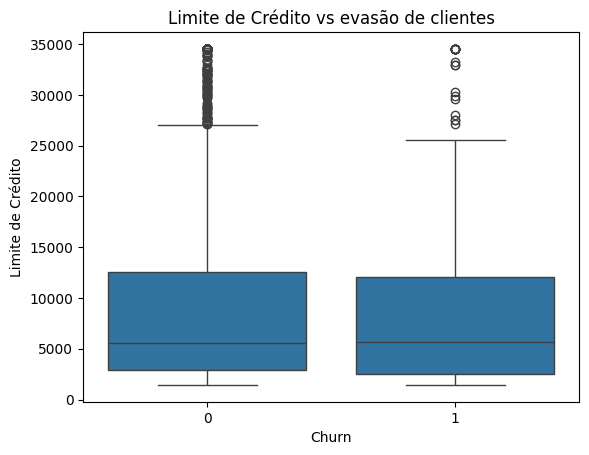

In [33]:
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df)
plt.title('Limite de Crédito vs Evasão de clientes')
plt.xlabel('Churn')
plt.ylabel('Limite de Crédito')
plt.show()


**Distribuição da Variável Target**

<ipython-input-26-0f9c130dc854>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition_Flag', data=df, palette='Set2')


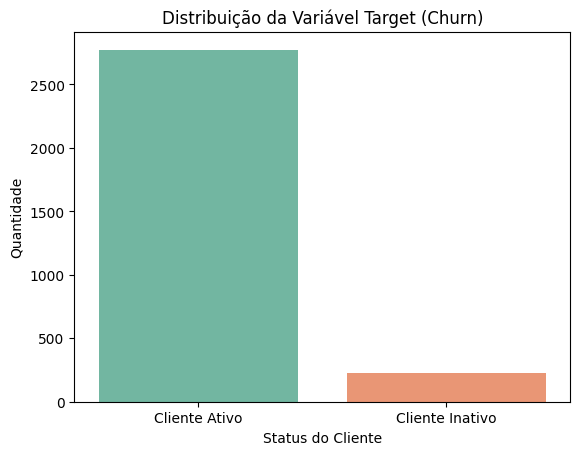

Proporção de clientes ativos: 92.53%
Proporção de clientes inativos: 7.47%


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição da variável alvo
sns.countplot(x='Attrition_Flag', data=df, palette='Set2')
plt.title('Distribuição da Variável Target (evasão de clientes)')
plt.xlabel('Status do Cliente')
plt.ylabel('Quantidade')
plt.xticks([0, 1], ['Cliente Ativo', 'Cliente Inativo'])
plt.show()

# Proporção
churn_rate = df['Attrition_Flag'].value_counts(normalize=True) * 100
print(f"Proporção de clientes ativos: {churn_rate[0]:.2f}%")
print(f"Proporção de clientes inativos: {churn_rate[1]:.2f}%")


**Histograma: Uso do Cartão vs Evasão**
Clientes que usam pouco o cartão têm maior chance de sair. Esse é um forte indicativo de comportamento de churn iminente.

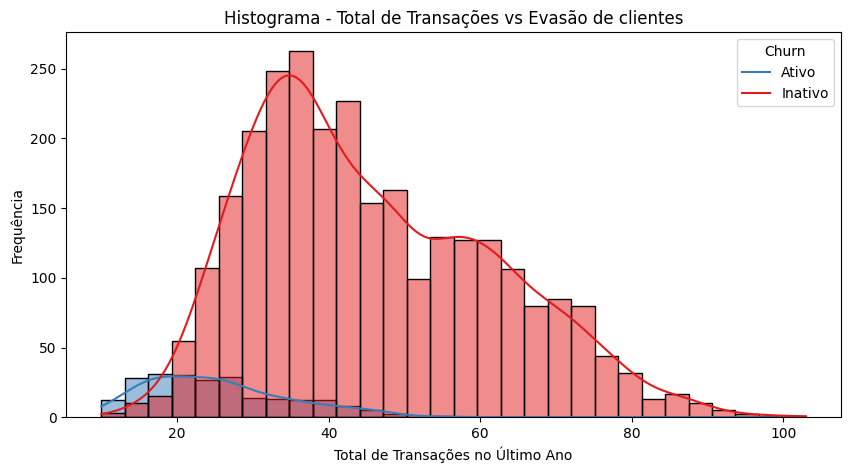

In [40]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Total_Trans_Ct', hue='Attrition_Flag', bins=30, kde=True, palette='Set1')
plt.title('Histograma - Total de Transações vs Evasão de clientes')
plt.xlabel('Total de Transações no Último Ano')
plt.ylabel('Frequência')
plt.legend(title='Churn', labels=['Ativo', 'Inativo'])
plt.show()


In [41]:
df_comp = df.copy()
df_comp['Churn'] = df_comp['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

grouped = df_comp.groupby('Churn').mean(numeric_only=True).T
grouped['Diferença (%)'] = ((grouped[1] - grouped[0]) / grouped[0]) * 100
grouped.sort_values('Diferença (%)', ascending=False).head(10)


Churn,0,1,Diferença (%)
Naive_Bayes_Classifier,2.090951e-04,9.941702e-01,475363.178427
Months_Inactive_12_mon,2.245133e+00,2.611607e+00,16.323028
Contacts_Count_12_mon,2.574261e+00,2.941964e+00,14.283839
Customer_Age,4.554398e+01,4.791964e+01,5.216196
Dependent_count,2.104542e+00,2.183036e+00,3.729720
Months_on_book,3.534823e+01,3.666071e+01,3.713002
Avg_Open_To_Buy,8.023413e+03,8.308636e+03,3.554884
CLIENTNUM,7.407385e+08,7.384430e+08,-0.309888
Credit_Limit,9.377615e+03,8.957096e+03,-4.484289
Total_Amt_Chng_Q4_Q1,8.253915e-01,7.443348e-01,-9.820391
